In [56]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [58]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [59]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [60]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [61]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [63]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [65]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [66]:
my_time = df['pickup_datetime'][0]

In [67]:
my_time.hour

8

In [68]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [69]:
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [70]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [71]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [72]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [73]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']

In [74]:
y_col = ['fare_amount']

In [75]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [76]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [77]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [78]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [79]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [80]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [81]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [82]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [83]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [84]:
cats = np.stack([hr, ampm, wkdy], axis=1)

In [85]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [86]:
#conts = np.stack([df[col].values for col in cont_cols], 1) #All in one line

In [87]:
cats = torch.tensor(cats, dtype=torch.int64)

In [88]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [89]:
conts

array([[ 40.730521  , -73.992365  ,  40.744746  , -73.975499  ,
          1.        ,   2.12631159],
       [ 40.740558  , -73.990078  ,  40.744114  , -73.974232  ,
          1.        ,   1.39230687],
       [ 40.751118  , -73.994149  ,  40.766235  , -73.960064  ,
          2.        ,   3.32676344],
       ...,
       [ 40.749772  , -73.988574  ,  40.707799  , -74.011541  ,
          3.        ,   5.05252282],
       [ 40.724529  , -74.004449  ,  40.730765  , -73.992697  ,
          1.        ,   1.20892296],
       [ 40.77192   , -73.955415  ,  40.763015  , -73.967623  ,
          3.        ,   1.42739869]])

In [90]:
conts = torch.tensor(conts, dtype=torch.float)
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [91]:
y = torch.tensor(df[y_col].values, dtype=torch.float)

In [92]:
cats.shape

torch.Size([120000, 3])

In [93]:
conts.shape

torch.Size([120000, 6])

In [94]:
y.shape

torch.Size([120000, 1])

In [95]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [96]:
cat_szs

[24, 2, 7]

In [97]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [98]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [99]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [100]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [101]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [102]:
embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:, i]))

In [103]:
embeddingz

[tensor([[ 0.5239,  1.4955,  1.5253, -0.1484,  0.2639,  0.0946,  0.5056, -0.7588,
          -1.8369,  1.2613, -0.2227, -0.5987],
         [ 0.5402,  0.1182,  0.8214,  0.3851,  0.2715,  1.4132, -0.5995,  1.2064,
          -0.4936, -0.5445,  0.2351,  1.3746],
         [-0.3148, -0.3583,  0.2698,  0.8619,  0.9939, -1.3755, -0.4607,  2.0831,
          -1.8745, -1.5309,  0.1110,  0.0202],
         [ 1.1118,  0.3630, -0.3315, -1.8846, -0.7711,  0.5470,  0.2441, -0.2168,
          -0.2775, -1.8341,  0.2365,  0.6101]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.6042],
         [-0.6042],
         [-0.6042],
         [ 0.1413]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7845, -0.6721, -0.8533, -2.3243],
         [ 0.3678,  0.0050,  0.5109, -2.3530],
         [ 0.3678,  0.0050,  0.5109, -2.3530],
         [-1.5667,  0.1767,  0.1913, -0.7869]], grad_fn=<EmbeddingBackward0>)]

In [104]:
z = torch.cat(embeddingz, 1)
z

tensor([[ 0.5239,  1.4955,  1.5253, -0.1484,  0.2639,  0.0946,  0.5056, -0.7588,
         -1.8369,  1.2613, -0.2227, -0.5987, -0.6042, -0.7845, -0.6721, -0.8533,
         -2.3243],
        [ 0.5402,  0.1182,  0.8214,  0.3851,  0.2715,  1.4132, -0.5995,  1.2064,
         -0.4936, -0.5445,  0.2351,  1.3746, -0.6042,  0.3678,  0.0050,  0.5109,
         -2.3530],
        [-0.3148, -0.3583,  0.2698,  0.8619,  0.9939, -1.3755, -0.4607,  2.0831,
         -1.8745, -1.5309,  0.1110,  0.0202, -0.6042,  0.3678,  0.0050,  0.5109,
         -2.3530],
        [ 1.1118,  0.3630, -0.3315, -1.8846, -0.7711,  0.5470,  0.2441, -0.2168,
         -0.2775, -1.8341,  0.2365,  0.6101,  0.1413, -1.5667,  0.1767,  0.1913,
         -0.7869]], grad_fn=<CatBackward0>)

In [105]:
selfembdrop = nn.Dropout(0.4)

In [106]:
z = selfembdrop(z)
z

tensor([[ 0.8731,  2.4925,  2.5422, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000,
         -3.0614,  0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -1.1202, -0.0000,
         -3.8738],
        [ 0.0000,  0.1970,  1.3690,  0.6419,  0.0000,  2.3553, -0.9992,  0.0000,
         -0.0000, -0.0000,  0.3918,  0.0000, -1.0069,  0.0000,  0.0000,  0.8515,
         -3.9216],
        [-0.5246, -0.5972,  0.4497,  1.4366,  1.6564, -2.2926, -0.0000,  3.4718,
         -3.1242, -2.5515,  0.0000,  0.0336, -0.0000,  0.6130,  0.0000,  0.8515,
         -3.9216],
        [ 0.0000,  0.0000, -0.5525, -3.1410, -0.0000,  0.0000,  0.0000, -0.3613,
         -0.4625, -3.0568,  0.3942,  1.0168,  0.2354, -0.0000,  0.0000,  0.3188,
         -1.3115]], grad_fn=<MulBackward0>)

In [112]:
class TabularModel(nn.Module):
    '''
    Layers is [h1, h2, etc.]
    '''
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5): #emb_szs is number of cat, n_cont is number of continuous
        super().__init__()

        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p) #Turn off a percentage of the neurons in an input tensor. This is to avoid overfitting, very common
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum([nf for ni, nf in emb_szs])
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i)) #Look at basic ANN to understand better.
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))

        #Sequential pipes every nn layer to the next layer. Every layer is ambiguous. The form of the sequence is done in the for loop.
        self.layers = nn.Sequential(*layerlist) #https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html?highlight=sequential#torch.nn.Sequential
        #Look at the first example in the URL.


    def forward(self, x_cat, x_cont): #This is one sample of x_cat, one sample of x_cont
        embeddings = []

        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i])) #The whole column but the column is just 1 because its 1 sample, i

        x = torch.cat(embeddings, 1) #1 is axis
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x) #Plug the sample into the layers...
        return x

In [113]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=0.4)

In [114]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [115]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> RMSE Root Mean Square EnvironmentError
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [116]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [117]:
cat_train = cats[:batch_size-test_size] #:48000
cat_test = cats[batch_size-test_size:batch_size]#48000:60000
con_train = conts[:batch_size-test_size]#:48000
con_test = conts[batch_size-test_size:batch_size]#48000:60000

In [118]:
y_train = y[:batch_size-test_size] #:48000
y_test = y[batch_size-test_size:batch_size]#48000:60000

In [119]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1

    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) #RMSE
    losses.append(loss)

    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 12.56900405883789
epoch: 11 loss is 11.707260131835938
epoch: 21 loss is 11.12645435333252
epoch: 31 loss is 10.723567962646484
epoch: 41 loss is 10.453316688537598
epoch: 51 loss is 10.229125022888184
epoch: 61 loss is 10.02641773223877
epoch: 71 loss is 9.842267990112305
epoch: 81 loss is 9.637164115905762
epoch: 91 loss is 9.42833137512207
epoch: 101 loss is 9.197369575500488
epoch: 111 loss is 8.908584594726562
epoch: 121 loss is 8.60515022277832
epoch: 131 loss is 8.245292663574219
epoch: 141 loss is 7.8454084396362305
epoch: 151 loss is 7.404979228973389
epoch: 161 loss is 6.963526725769043
epoch: 171 loss is 6.499785423278809
epoch: 181 loss is 6.006546974182129
epoch: 191 loss is 5.509850978851318
epoch: 201 loss is 5.040947437286377
epoch: 211 loss is 4.6504998207092285
epoch: 221 loss is 4.355270862579346
epoch: 231 loss is 4.104333877563477
epoch: 241 loss is 3.9275684356689453
epoch: 251 loss is 3.8858020305633545
epoch: 261 loss is 3.792717456817627
epoch:

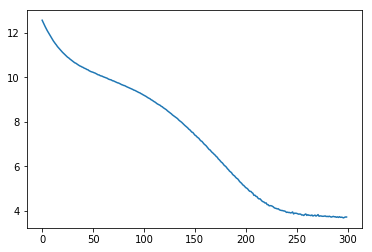

In [121]:
with torch.no_grad():
    plt.plot(range(epochs), losses)

In [122]:
with torch.no_grad():
    y_val = model(cat_test, con_test) #this is where you input into novel data. Check the official notebook to see how to input() from keyboard.
    loss = torch.sqrt(criterion(y_val, y_test))

In [123]:
loss

tensor(3.6240)

In [125]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} DIFF: {diff:8.2f}')

0.) PREDICTED:     4.13 TRUE:     2.90 DIFF:     1.23
1.) PREDICTED:    14.59 TRUE:     5.70 DIFF:     8.89
2.) PREDICTED:     7.00 TRUE:     7.70 DIFF:     0.70
3.) PREDICTED:    14.73 TRUE:    12.50 DIFF:     2.23
4.) PREDICTED:     5.83 TRUE:     4.10 DIFF:     1.73
5.) PREDICTED:     5.25 TRUE:     5.30 DIFF:     0.05
6.) PREDICTED:     4.71 TRUE:     3.70 DIFF:     1.01
7.) PREDICTED:    20.19 TRUE:    14.50 DIFF:     5.69
8.) PREDICTED:     9.60 TRUE:     5.70 DIFF:     3.90
9.) PREDICTED:    12.61 TRUE:    10.10 DIFF:     2.51


In [126]:
torch.save(model.state_dict(), 'TaxiModel.pt')